In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np 

filename = "RECORD_20231117151036.csv"
row_0 = []
row_2 = []
row_1 = []

with open(filename, 'r') as file:
  reader = csv.reader(file)
  next(reader) # skip first line
  for row in reader:
    row_0.append(float(row[0]))
    row_2.append(float(row[2]))
    row_1.append(float(row[1]))

# convert to numpy array
row_0 = np.array(row_0)
row_2 = np.array(row_2)
row_1 = np.array(row_1)


row_2_ppm = (row_2 - np.mean(row_2)) / np.std(row_2)
row_1_ppm = (row_1 - np.mean(row_1)) / np.std(row_1)

# print a sample
print(row_0[0:10])
print(row_2[0:10])
print(row_1[0:10])

# we use a centered moving average to smooth the data withour introducing a lag
def centered_moving_average(data, window_size):
    """Compute a centered moving average."""
    half_window = window_size // 2
    extended_data = np.pad(data, (half_window, half_window), mode='edge')
    cumsum = np.cumsum(extended_data)
    
    # Subtract the cumulated sum shifted by the window size from the cumulated sum 
    # to get the sum over the window for each point
    sum_window = cumsum[window_size:] - cumsum[:-window_size]
    return sum_window / window_size


[1.0000002 1.        1.0000002 1.0000002 1.0000001 1.        1.0000001
 1.0000001 1.0000001 1.0000001]
[9.9999196 9.9999201 9.9999193 9.9999193 9.9999195 9.9999207 9.9999205
 9.99992   9.9999202 9.9999201]
[9.9999211 9.9999202 9.9999209 9.9999211 9.9999207 9.9999209 9.9999216
 9.9999213 9.9999213 9.9999214]


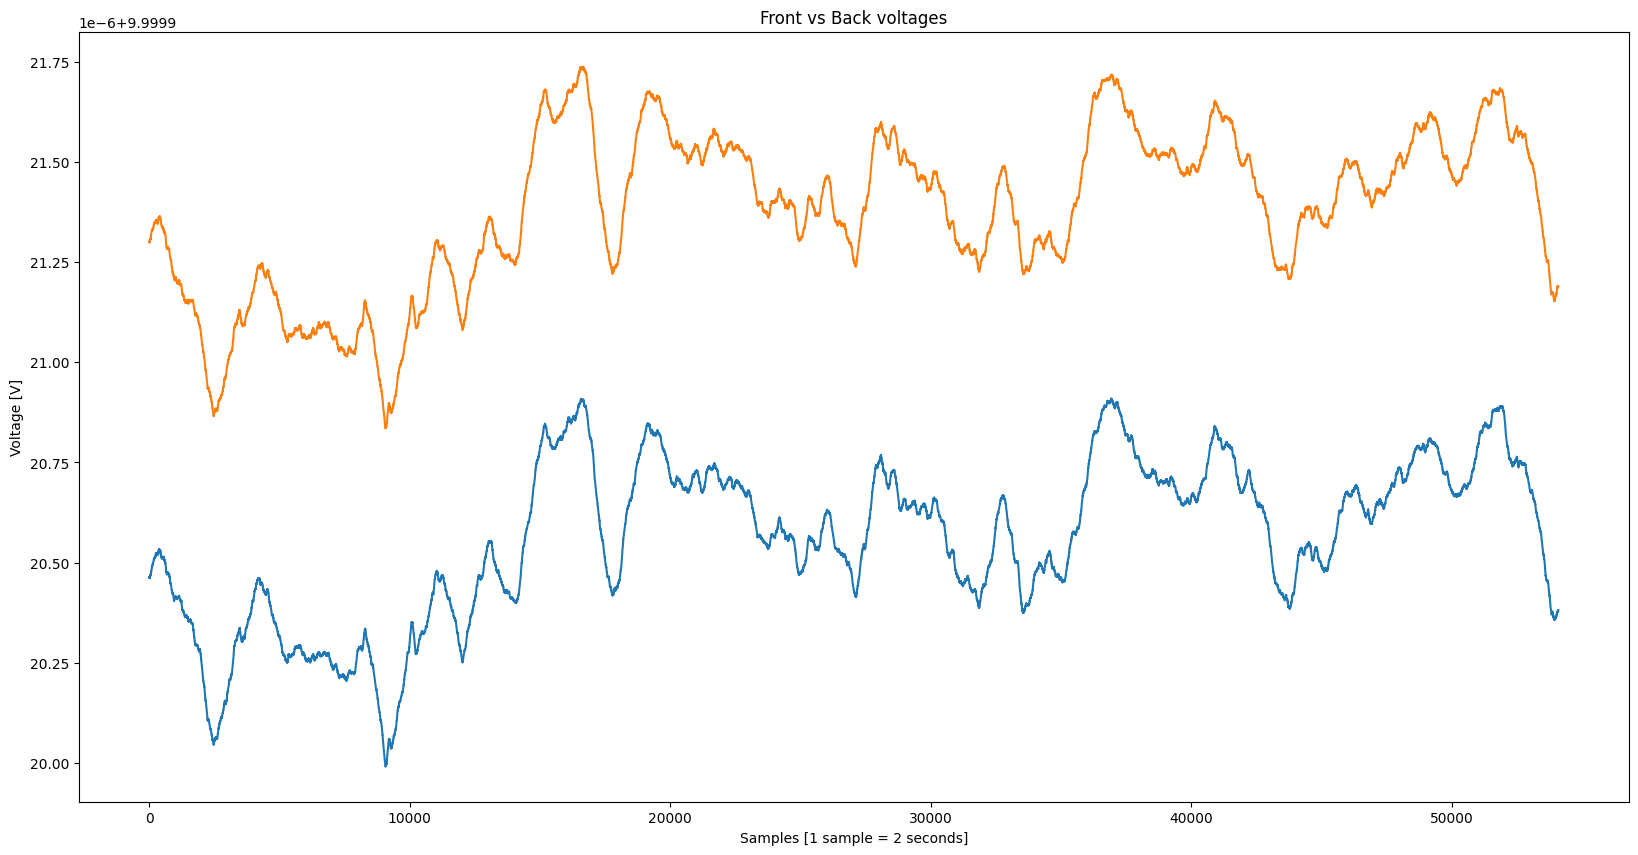

In [3]:
# plot the data
# plt.plot(row_0)
plt.figure(figsize=(20,10))
plt.plot(centered_moving_average(row_2,1000)[1000:-1000])
plt.plot(centered_moving_average(row_1,1000)[1000:-1000])
plt.title("Front vs Back voltages")

plt.xlabel("Samples [1 sample = 2 seconds]")
plt.ylabel("Voltage [V]")
plt.savefig("9_front_vs_back_voltages.png")
plt.show()

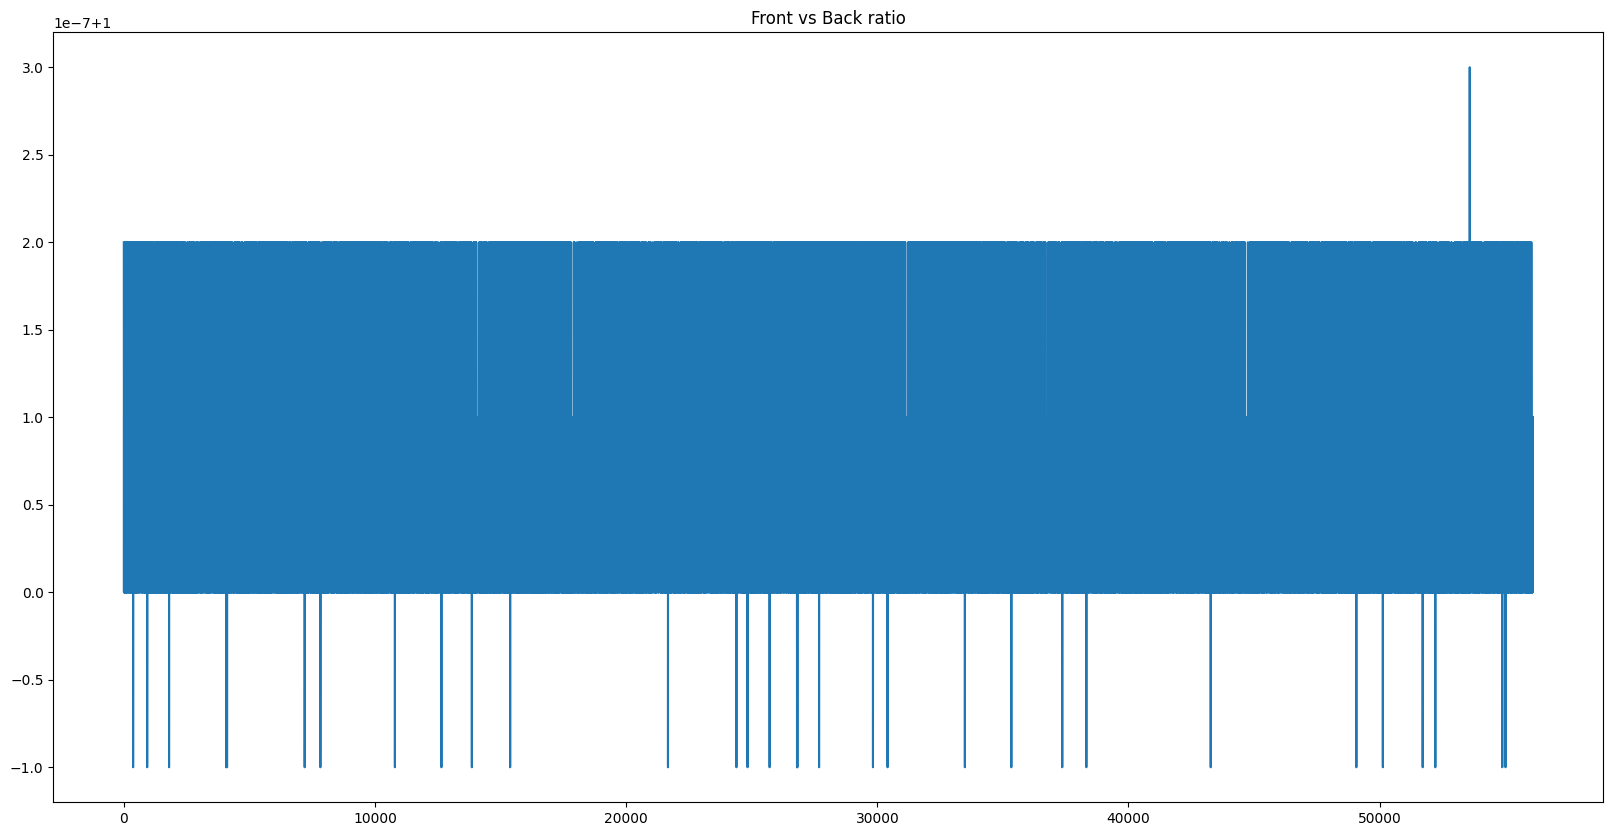

In [4]:
plt.figure(figsize=(20,10))

plt.plot(row_0)

plt.title("Front vs Back ratio")

plt.show()

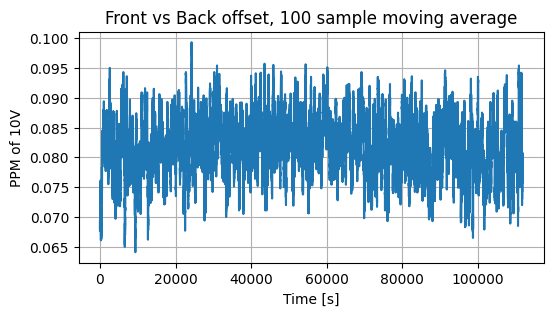

In [8]:
plt.figure(figsize=(6, 3))

time_in_seconds = np.arange(0, len(row_1[100:-100]) * 2,2 )

# front - back offset

plt.plot(time_in_seconds, 1e6/10*centered_moving_average(row_1-row_2,100)[100:-100], label="offset")




plt.title("Front vs Back offset, 100 sample moving average")
plt.ylabel("PPM of 10V")

plt.xlabel("Time [s]")
plt.grid()
plt.savefig("9_front_vs_back_offset.png", dpi=300, bbox_inches='tight')

plt.show()